In [9]:
!pip install numpy matplotlib

PRIMEIRA QUESTÃO
1) Modele os seguintes sólidos/objetos 
Na construção dos sólidos, crie uma função que retorne o sólido ( ou seja, retorne a matriz de vértices e arestas). Perceba que cada objeto é descrito indiretamente (no caso do cone, por exemplo, pelo raio e pela altura). A origem do objeto pode ser definida de forma fixa dentro da função ou, opcionalmente, pode ser passada também como parâmetro da função.

In [1]:
import sys
import numpy as np
sys.path.append('./modelos')  # adiciona a pasta modelos ao path

from utils import plotar_malha_3d

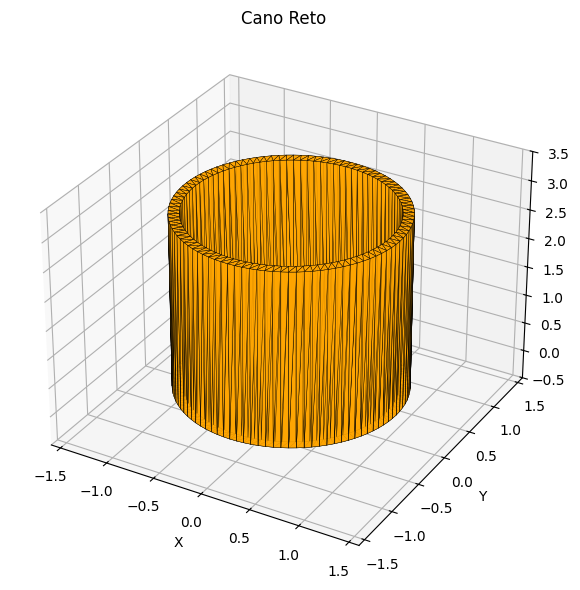

In [2]:
from objeto import Objeto3D

cano_reto = Objeto3D()
cano_reto.modelar_cano_reto(raio_interno=1, raio_externo=1.1, altura=3.0, resolucao=100)
plotar_malha_3d(cano_reto.vertices, cano_reto.faces, titulo="Cano Reto")

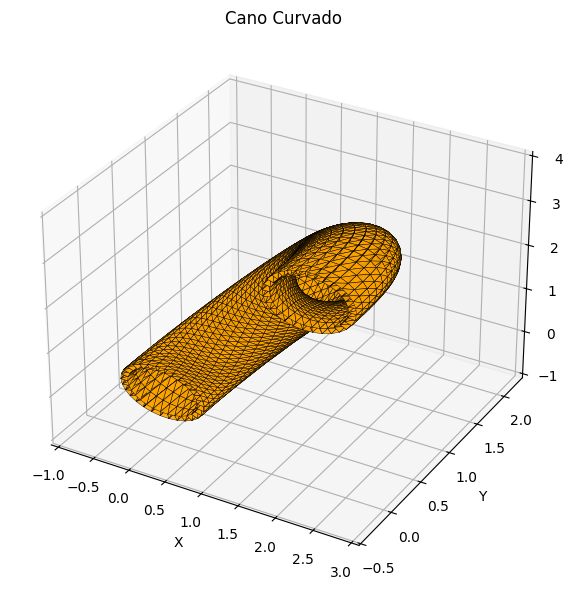

In [3]:
cano_curvado = Objeto3D()

cano_curvado.gerar_cano_curvado(
    P0 = np.array([0, 0, 0]),
    P1 = np.array([2, 0, 3]),
    T0 = np.array([0, 5, 0]), 
    T1 = np.array([0, -5, 0]),
    raio_externo=0.6,
    raio_interno=0.5,
    resolucao_circular=30,
    resolucao_curva=50)

plotar_malha_3d(cano_curvado.vertices, cano_curvado.faces,
                titulo="Cano Curvado")

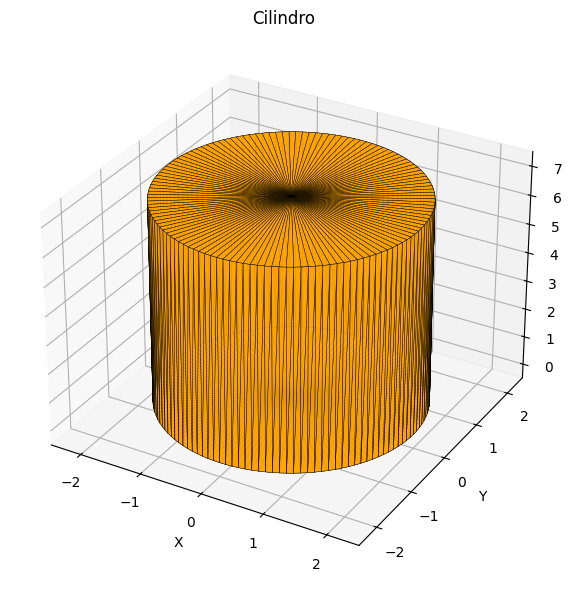

In [4]:
cilindro = Objeto3D()
cilindro.modelar_cilindro(raio=2.0, altura=7.0, resolucao=128)
plotar_malha_3d(cilindro.vertices, cilindro.faces, titulo="Cilindro")

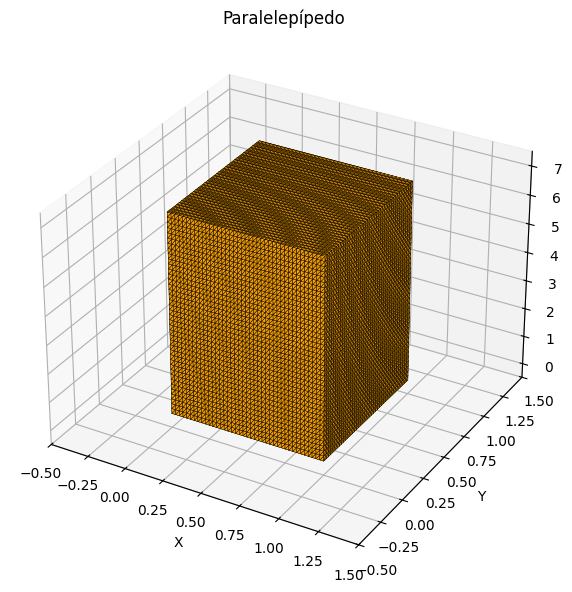

In [5]:
paralelepipedo = Objeto3D()
paralelepipedo.modelar_paralelepipedo(base=1, altura=7, comprimento=1, resolucao = 40)
plotar_malha_3d(paralelepipedo.vertices, paralelepipedo.faces, titulo="Paralelepípedo")

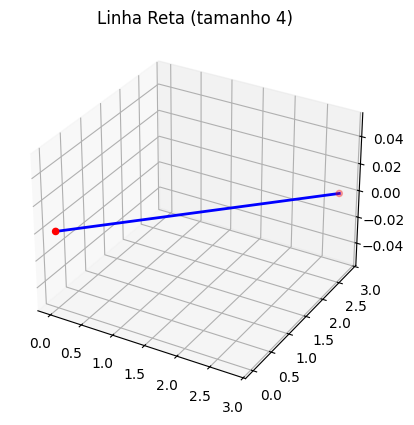

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

reta = Objeto3D()
reta.modelar_linha(tamanho=4, direcao=np.array([1, 1, 0]))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x_vals = [v[0] for v in reta.vertices]
y_vals = [v[1] for v in reta.vertices]
z_vals = [v[2] for v in reta.vertices]

ax.plot(x_vals, y_vals, z_vals, color='blue', linewidth=2)
ax.scatter(x_vals, y_vals, z_vals, color='red')  # marca os pontos
ax.set_title("Linha Reta (tamanho 4)")
plt.show()

[INFO] Normalizando cena (uniforme) com fator 0.695


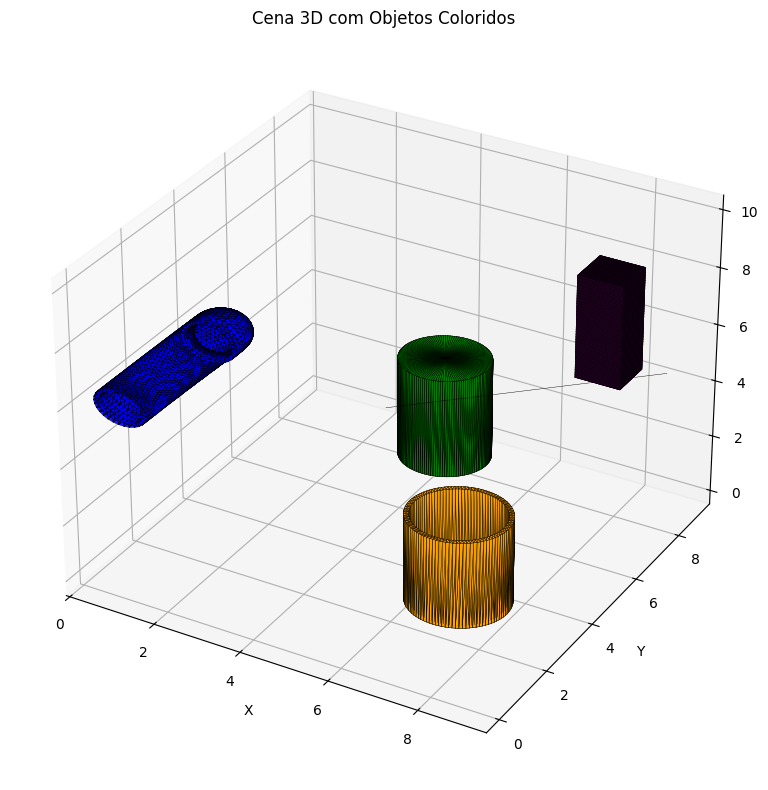

In [7]:
# 1. Modele e transforme individualmente
from utils import normalizar_cena, plotar_malhas_3d_multiplos

cano_reto.aplicar_translacao([0, 0, 0])
#cano_reto.aplicar_rotacao('x', 90)
cano_reto.aplicar_translacao([7, 3, 0])

cano_curvado.aplicar_translacao([1, 0, 6])
cano_curvado.aplicar_escala(sx=1.5,sy=1.5, sz=1.5)

cilindro.aplicar_escala(sx=0.5,sy=0.5, sz=0.5)

cilindro.aplicar_translacao([4, 8, 0])

paralelepipedo.aplicar_escala(sx=1, sy=1, sz=0.5)
#paralelepipedo.aplicar_rotacao('z', 45)
paralelepipedo.aplicar_translacao([8, 6, 6])

reta.aplicar_translacao([3, 3, 3])
reta.aplicar_escala(sx=1.5,sy=1.5, sz=1.5)


cano_reto.vertices = normalizar_cena(cano_reto.vertices)
cano_curvado.vertices = normalizar_cena(cano_curvado.vertices)
cilindro.vertices = normalizar_cena(cilindro.vertices)
paralelepipedo.vertices = normalizar_cena(paralelepipedo.vertices)
reta.vertices = normalizar_cena(reta.vertices)


# 2. Atribuir faces
cano_reto.atribuir_faces()
cano_curvado.atribuir_faces()
cilindro.atribuir_faces()
paralelepipedo.atribuir_faces()
reta.atribuir_faces()

# 3. Unir todos os vértices e faces
vertices_total = (
    cano_reto.vertices +
    cano_curvado.vertices +
    cilindro.vertices +
    paralelepipedo.vertices +
    reta.vertices
)

faces_total = (
    cano_reto.faces +
    cano_curvado.faces +
    cilindro.faces +
    paralelepipedo.faces +
    reta.faces
)

objetos = [
    (cano_reto.vertices, cano_reto.faces, "orange", "Cano Reto"),
    (cano_curvado.vertices, cano_curvado.faces, "blue", "Cano Curvado"),
    (cilindro.vertices, cilindro.faces, "green", "Cilindro"),
    (paralelepipedo.vertices, paralelepipedo.faces, "purple", "Paralelepípedo"),
    (reta.vertices, reta.faces, "brown", "Reta")
]

plotar_malhas_3d_multiplos(objetos, titulo="Cena 3D com Objetos Coloridos")


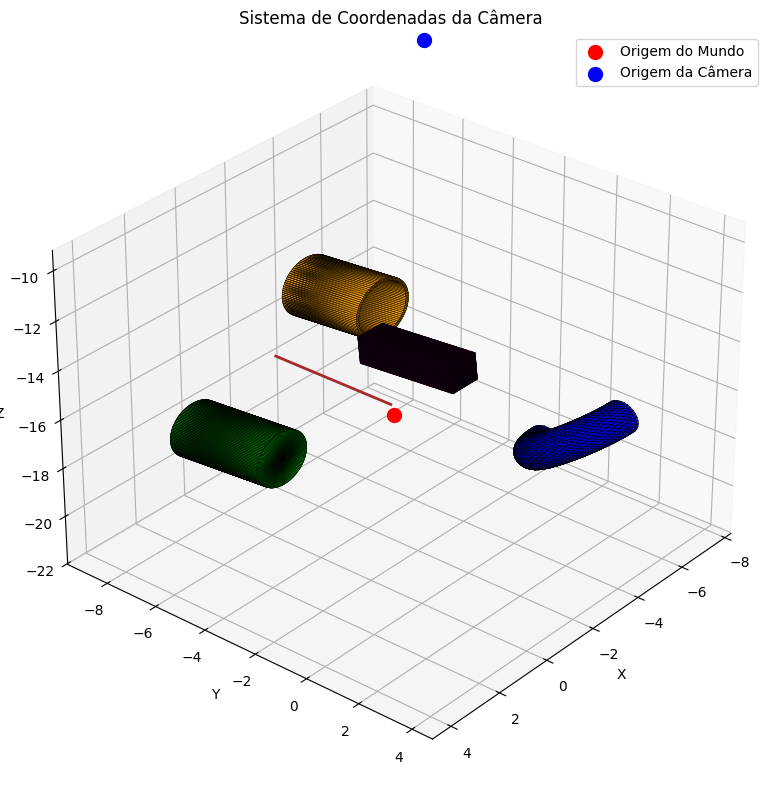

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 1. Agrupando todos os vértices (exceto a linha)
objetos_3d = [cano_reto, cano_curvado, cilindro, paralelepipedo]
vertices_geral = np.vstack([np.array(obj.vertices) for obj in objetos_3d])

# 2. Definir câmera baseada no centro da cena
centro = np.mean(vertices_geral, axis=0)
camera_pos = centro + np.array([12.1, 0.0, 1.1])   # Posição da câmera
camera_target = centro                    # Olha para o centro
up = np.array([0, 0, 1])

# Corrigir alinhamento com vetor de visão
z_cam = (camera_pos - camera_target)
z_cam = z_cam / np.linalg.norm(z_cam)
if abs(np.dot(z_cam, up)) > 0.98:
    up = np.array([0, 1, 0])

x_cam = np.cross(up, z_cam)
x_cam = x_cam / np.linalg.norm(x_cam)
y_cam = np.cross(z_cam, x_cam)
R = np.array([x_cam, y_cam, z_cam])  # Matriz de rotação

# 3. Transformar para coordenadas da câmera
def para_camera(vertices):
    deslocados = np.array(vertices) - camera_pos
    return (R @ deslocados.T).T

# 4. Estruturar os objetos
def organizar_objeto(nome, objeto, cor, alpha):
    return {
        "nome": nome,
        "vertices": np.array(objeto.vertices),
        "faces": objeto.faces,
        "cor": cor,
        "alpha": alpha
    }

objetos = [
    organizar_objeto("Cano Reto", cano_reto, "orange", 0.8),
    organizar_objeto("Cano Curvado", cano_curvado, "blue", 0.8),
    organizar_objeto("Cilindro", cilindro, "green", 0.8),
    organizar_objeto("Paralelepípedo", paralelepipedo, "purple", 0.8),
    {
        "nome": "Linha Reta",
        "vertices": np.array(reta.vertices),
        "faces": None,
        "cor": "brown",
        "alpha": 1.0
    }
]

# 5. Plotagem dos dois sistemas
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for obj in objetos:
    verts = para_camera(obj["vertices"])
    faces = obj["faces"]
    cor = obj["cor"]
    alpha = obj["alpha"]

    if faces:
        polys = [[verts[i] for i in face] for face in faces]
        ax.add_collection3d(Poly3DCollection(polys, facecolor=cor, edgecolor='k', alpha=alpha, linewidths=0.3))
    else:
        ax.plot(verts[:, 0], verts[:, 1], verts[:, 2], color=cor, linewidth=2)

# Marcar a origem do mundo (transformada para a câmera)
origem_mundo_em_camera = para_camera([[0, 0, 0]])[0]
ax.scatter(*origem_mundo_em_camera, color='red', s=100, label='Origem do Mundo', depthshade=False)

# Origem da câmera = (0, 0, 0)
ax.scatter(0, 0, 0, color='blue', s=100, label='Origem da Câmera', depthshade=False)

# Ajustes de eixos
pts_cam = np.vstack([para_camera(obj["vertices"]) for obj in objetos])
pad = 2.0
ax.set_xlim(pts_cam[:, 0].min() - pad, pts_cam[:, 0].max() + pad)
ax.set_ylim(pts_cam[:, 1].min() - pad, pts_cam[:, 1].max() + pad)
ax.set_zlim(pts_cam[:, 2].min() - pad, pts_cam[:, 2].max() + pad)
ax.set_title("Sistema de Coordenadas da Câmera")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.view_init(elev=30, azim=40)
ax.legend()

plt.tight_layout()
plt.show()


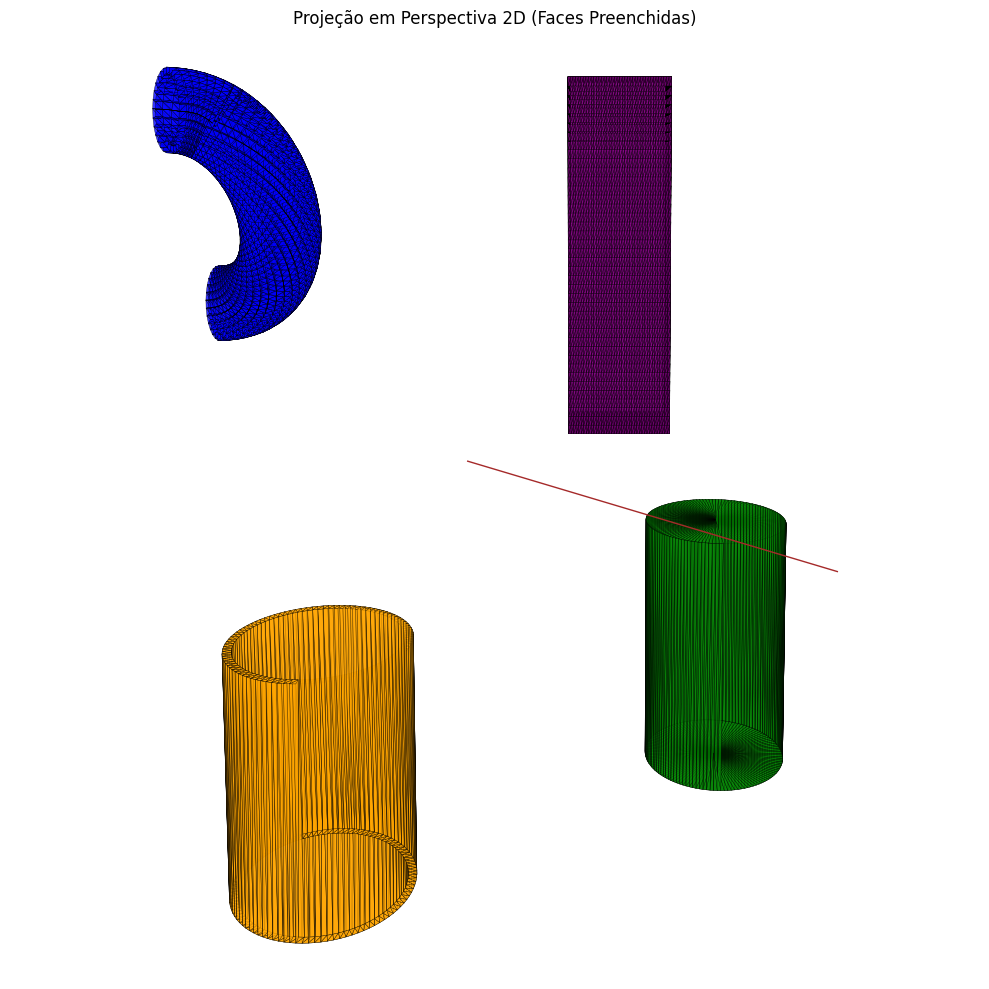

In [9]:
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# Distância focal da projeção
d = 1.0

# Projeção em perspectiva
def perspectiva(pts):
    pts = np.array(pts)
    z = pts[:, 2]
    z[z == 0] = 1e-6  # evitar divisão por zero
    x_proj = -pts[:, 0] / z * d
    y_proj = -pts[:, 1] / z * d
    return np.stack([x_proj, y_proj], axis=1)

# Transformar e projetar objetos
objetos_proj = []
for obj in objetos:
    verts_3d = para_camera(obj["vertices"])
    verts_2d = perspectiva(verts_3d)
    objetos_proj.append({
        "nome": obj["nome"],
        "vertices": verts_2d,
        "faces": obj["faces"],
        "cor": obj["cor"]
    })

# Plotando faces preenchidas
plt.figure(figsize=(10, 10))
ax = plt.gca()

for obj in objetos_proj:
    verts = obj["vertices"]
    faces = obj["faces"]
    cor = obj["cor"]

    if faces:
        patches = []
        for face in faces:
            pts = verts[face]
            polygon = Polygon(pts, closed=True)
            patches.append(polygon)
        collection = PatchCollection(patches, facecolor=cor, edgecolor='black', linewidths=0.3, alpha=0.8)
        ax.add_collection(collection)
    else:
        ax.plot(verts[:, 0], verts[:, 1], color=cor, linewidth=1.0)

ax.set_title("Projeção em Perspectiva 2D (Faces Preenchidas)")
ax.set_xlabel("x'")
ax.set_ylabel("y'")
ax.axis("equal")
ax.axis("off")
plt.tight_layout()
plt.show()


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
from matplotlib.path import Path
import os

# --- Transformação de mundo para câmera
def world_to_camera(V, C, R):
    trans = V - C
    return (R @ trans.T).T

# --- Projeção em perspectiva
def perspective_project(camera_vertices, d=2.0):
    x = camera_vertices[:, 0]
    y = camera_vertices[:, 1]
    z = camera_vertices[:, 2]
    return np.stack([d * x / z, d * y / z], axis=1)

# --- Normalização para a imagem
def normalize_xy(xy, min_xy, max_xy):
    normed = (xy - min_xy) / (max_xy - min_xy + 1e-8)
    return normed * 0.93 + 0.03

# --- Rasterizador de triângulo preenchido
def draw_filled_triangle(image, tri, color):
    x_min = max(int(np.floor(np.min(tri[:, 0]) * image.shape[1])), 0)
    x_max = min(int(np.ceil(np.max(tri[:, 0]) * image.shape[1])), image.shape[1])
    y_min = max(int(np.floor(np.min(tri[:, 1]) * image.shape[0])), 0)
    y_max = min(int(np.ceil(np.max(tri[:, 1]) * image.shape[0])), image.shape[0])

    if x_max <= x_min or y_max <= y_min:
        return

    x_coords = np.arange(x_min, x_max)
    y_coords = np.arange(y_min, y_max)
    xv, yv = np.meshgrid(x_coords, y_coords)
    points = np.vstack((xv.ravel(), yv.ravel())).T

    tri_scaled = tri * np.array([image.shape[1], image.shape[0]])
    path = Path(tri_scaled)
    mask = path.contains_points(points).reshape((y_max - y_min, x_max - x_min))

    for c in range(3):
        image[y_min:y_max, x_min:x_max, c][mask] = color[c]

# --- Rasterização dos objetos com perspectiva
def rasterize_objetos_perspectiva(objetos, C, R, resolucoes, nome_view="view"):
    proj_total = []
    for verts, _, _, _ in objetos:
        cam = world_to_camera(verts, C, R)
        proj = perspective_project(cam)
        proj_total.append(proj)
    proj_total = np.vstack(proj_total)
    min_xy = proj_total.min(axis=0)
    max_xy = proj_total.max(axis=0)

    os.makedirs("rasterizados", exist_ok=True)

    for res in resolucoes:
        img = np.ones((res, res, 3), dtype=np.float32)

        for verts, faces, cor, _ in objetos:
            cam_verts = world_to_camera(verts, C, R)
            proj_2d = normalize_xy(perspective_project(cam_verts), min_xy, max_xy)
            rgb = to_rgb(cor)

            if faces is not None and len(faces) > 0:
                for face in faces:
                    if len(face) == 3:
                        tri = proj_2d[face]
                        draw_filled_triangle(img, tri, rgb)
                    elif len(face) == 2:
                        pt1 = proj_2d[face[0]]
                        pt2 = proj_2d[face[1]]
                        rr = np.linspace(pt1[1], pt2[1], 100)
                        cc = np.linspace(pt1[0], pt2[0], 100)
                        img[(rr * res).astype(int), (cc * res).astype(int)] = rgb

        plt.figure(figsize=(6, 6))
        plt.imshow(img)
        plt.title(f"{nome_view} - resolução {res}x{res}", fontsize=14)
        plt.axis("off")
        caminho = f"rasterizados/{nome_view}_{res}x{res}.png"
        plt.savefig(caminho, bbox_inches="tight", pad_inches=0.1)
        plt.close()
        print(f"Imagem salva: {caminho}")



In [11]:
objetos = [
    (cano_reto.vertices, cano_reto.faces, "orange", "Cano Reto"),
    (cano_curvado.vertices, cano_curvado.faces, "blue", "Cano Curvado"),
    (cilindro.vertices, cilindro.faces, "green", "Cilindro"),
    (paralelepipedo.vertices, paralelepipedo.faces, "purple", "Paralelepípedo"),
    (reta.vertices, reta.faces, "brown", "Reta")
]

# Dados da câmera
C = np.array([12.1, 0.0, 1.1])   
u = np.array([0.0, 1.0, 0.0])
v = np.array([0.0, 0.0, 1.0])
w = np.array([-1.0, 0.0, 0.0])
R = np.stack([u, v, w], axis=0)

rasterize_objetos_perspectiva(objetos, C, R, resolucoes=[150, 600, 1000])

Imagem salva: rasterizados/view_150x150.png
Imagem salva: rasterizados/view_600x600.png
Imagem salva: rasterizados/view_1000x1000.png
